In [4]:
!pip install seaborn

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load your dataset
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows
print(df.head())



   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [7]:
df = df.dropna()

In [9]:
X = df[['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


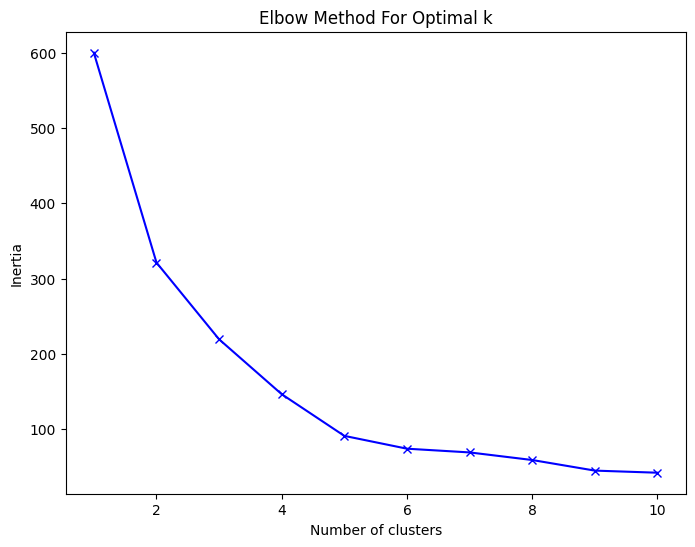

In [11]:
# Elbow method to find the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [12]:
# Apply KMeans with optimal number of clusters (for example, k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to your dataset
df['cluster'] = kmeans.labels_

# View the first few rows to see cluster assignments
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


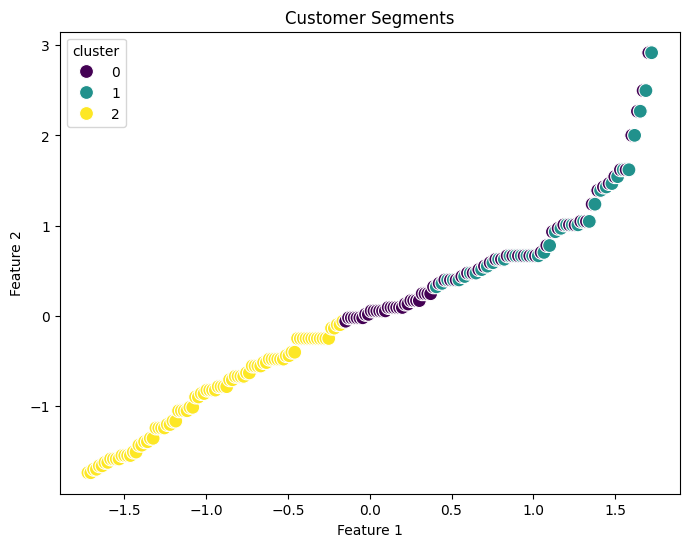

In [13]:
# Plot clusters (if data is 2D or reducible to 2D)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['cluster'], palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
